<a href="https://colab.research.google.com/github/JulianaHerreraM/hello-word/blob/master/HH_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

dt = 1e-6
tmax = 20e-3
vr = -64e-3   #resting potential
cmemb = 1e-6  #membrane capacitance
vNa = 50e-3   #Sodium Nernst potential
vK = -77e-3   #Potassium Nernst potential

In [ ]:
#cálculo de alpha y betas
def calcab(voltage, vr):
    an = (10*(-1000*(voltage-vr)+10))/(math.exp((-1000*(voltage-vr)+10)/10)-1)
    am = (100*(-1000*(voltage-vr)+25))/(math.exp((-1000*(voltage-vr)+25)/10)-1)
    ah = 70*math.exp(-1000*(voltage-vr)/20)
    bn = 125*math.exp(-1000*(voltage-vr)/80)
    bm = 4000*math.exp(-1000*(voltage-vr)/18)
    bh = 1000/(math.exp((-1000*(voltage-vr)+30)/10)+1)

    return an, am, ah, bn, bm, bh

In [ ]:
#cálculo de valores iniciales
def init_values(voltage, vr):
    an, am, ah, bn, bm, bh = calcab(voltage, vr)
    n = an/(an+bn)
    m = am/(am+bm)
    hh = ah/(ah+bh)
    return n, m, hh

In [ ]:
#cálculo de conductancias y corrientes
def calc_currents(n, m, hh, voltage, vr, vK, vNa):
    gK = 36e-3*math.pow(n, 4)
    gNa = 120e-3*math.pow(m, 3)*hh
    jK = gK*(voltage-vK)
    jNa = gNa*(voltage-vNa)
    jL =3e-4*(voltage-vr-10.6e-3)
    jmemb = jK+jNa+jL
    return gK, gNa, jK, jNa, jL, jmemb

In [ ]:
#Main
t=0
voltage=vr
n, m, hh = init_values(voltage, vr)
voltage_final = []
t_final = []

# results = t, voltage, gK, gNa, jK, jNa, jL, jmemb, n, m, hh
results = [[], [], [], [], [], [], [], [], [], [], []]

while(t<tmax):
  gK, gNa, jK, jNa, jL, jmemb = calc_currents(n, m, hh, voltage, vr, vK, vNa)
  
  if((t>=5e-4) & (t<6e-4)):
    jstim = 1e-4
  else:
    jstim = 0

  dvdt = (-jmemb+jstim)/cmemb
  voltage = voltage+dvdt*dt
  an, am, ah, bn, bm, bh = calcab(voltage, vr)
  dndt = an*(1-n)-bn*n
  dmdt = am*(1-m)-bm*m
  dhdt = ah*(1-hh)-bh*hh

  n = n+dndt*dt
  m = m+dmdt*dt
  hh = hh+dhdt*dt

  results[0].append(t*1000)
  results[1].append(voltage*1000)
  results[2].append(gK)
  results[3].append(gNa)
  results[4].append(jK)
  results[5].append(jNa)
  results[6].append(jL)
  results[7].append(jmemb)
  results[8].append(n)
  results[9].append(m)
  results[10].append(hh)

  t=t+dt

results_header = ['t', 'voltage', 'gK', 'gNa', 'jK', 'jNa', 'jL', 'jmemb', 'n', 'm', 'hh']

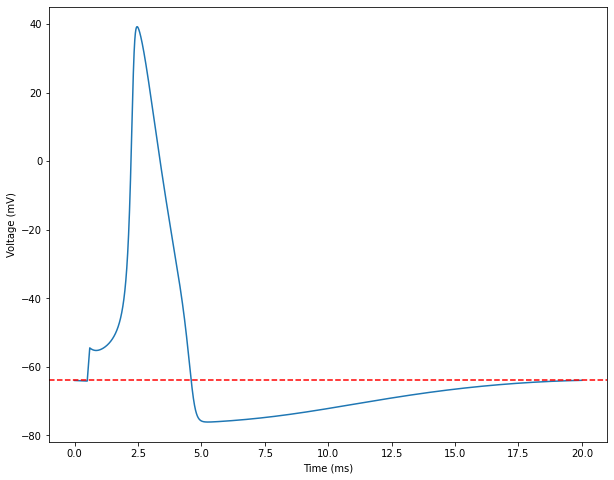

In [ ]:
# Figures:
plt.figure(figsize=(10, 8))
plt.plot(results[0], results[1])
plt.axhline(y = -64, color = 'r', linestyle = '--')
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (mV)")

plt.show()

In [ ]:
results = np.array(results).T
np.savetxt('resultados.csv', results, fmt='%1.4f', delimiter='\t')

**Como cargar datos**

In [ ]:
load_results = np.loadtxt('resultados.csv', delimiter='\t')
load_results.shape

(20001, 11)

In [ ]:
import pandas as pd
df = pd.DataFrame(results, columns=['t', 'voltage', 'gK', 'gNa', 'jK', 'jNa', 'jL', 'jmemb', 'n', 'm', 'hh'])
df

,t,voltage,gK,gNa,jK,jNa,jL,jmemb,n,m,hh
0,0.000,-64.000377,0.000367,0.000011,0.000005,-0.000001,-0.000003,3.769299e-07,0.317677,0.052932,0.596121
1,0.001,-64.000754,0.000367,0.000011,0.000005,-0.000001,-0.000003,3.766753e-07,0.317677,0.052932,0.596121
2,0.002,-64.001130,0.000367,0.000011,0.000005,-0.000001,-0.000003,3.764214e-07,0.317677,0.052932,0.596121
3,0.003,-64.001506,0.000367,0.000011,0.000005,-0.000001,-0.000003,3.761683e-07,0.317677,0.052932,0.596121
4,0.004,-64.001882,0.000367,0.000011,0.000005,-0.000001,-0.000003,3.759160e-07,0.317677,0.052932,0.596121
...,...,...,...,...,...,...,...,...,...,...,...
19996,19.996,-63.953666,0.000325,0.000011,0.000004,-0.000001,-0.000003,-1.696366e-07,0.308336,0.052928,0.615771
19997,19.997,-63.953496,0.000325,0.000011,0.000004,-0.000001,-0.000003,-1.695102e-07,0.308338,0.052929,0.615768
19998,19.998,-63.953327,0.000325,0.000011,0.000004,-0.000001,-0.000003,-1.693838e-07,0.308340,0.052931,0.615766
19999,19.999,-63.953157,0.000325,0.000011,0.000004,-0.000001,-0.000003,-1.692575e-07,0.308341,0.052932,0.615763
